# Podstawy drgań i aeroelastyczności

Przedstawione rozwiązanie zostało przygotowane przy użyciu biblioteki SymPy.

In [3]:
from sympy import *
from IPython.display import display, Image
from sympy.physics.vector import *
init_vprinting()

## Dane

Do znalezienia postaci rozwiązań małych drgań posłużę się danymi:

In [2]:
m = 4 #[kg]
M = 9 #[kg]
a = 0.8 #[m]
b = 1.9 #[m]
c = 2.2 #[m]
r = 0.8 #[m]
k1 = 1800 #[N/m]
k2 = 1600 #[N/m]
k3 = 420 #[Nm/rad]

## Rysunek

Rysunek poglądowy bez zachowanej skali:

![Rysunek układu](https://github.com/adamsmietanka/Drgania---projekt/blob/master/img/rysunek.PNG?raw=true)

## Moment bezwładności ciała w ruchu obrotowym

In [3]:
# Definiuję współrzedne do całkowania
x, y, IZ = symbols('x y I_z')

# Masa jednostkowa
u = m/(a+b+c)

# Definuję całki
Ia = integrate(u * y**2, (y, 0, a))
Ib = integrate(u * x**2, (x, 0, b))
Ic = integrate(u * (y**2 + b**2), (y, 0, c))
Iz = Ia + Ib + Ic

# Zaokrąglam i wyświetlam wynik
Eq(IZ, Iz.evalf(4))

## Wektor prędkości środka masy M

![Wektory położenia](https://github.com/adamsmietanka/Drgania---projekt/blob/master/img/wektory.PNG?raw=true)

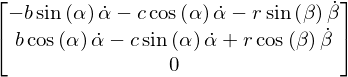

In [4]:
A, B, C, R, t, VZ = symbols('a b c r t V_z')

# Definiuję kąty jako funkcje czasu
alpha = Function('alpha')(t)
beta = Function('beta')(t)

# Definiuję wektory położenia
r1 = Matrix([B * cos(alpha), B * sin(alpha), 0])
r2 = Matrix([-C * sin(alpha), C * cos(alpha), 0])
r3 = Matrix([R * cos(beta), R * sin(beta), 0])
rz = r1 + r2 + r3

# Obliczam pochodną wektora położenia po czasie
Vz = rz.diff(t)
Vz

# Energia kinetyczna ciał

Wyznaczam je jako funkcje współrzędnych i prędkości uogólnionych:

\begin{array}{ll}
\omega_1 = \dot{\alpha} &  \omega_2 = \dot{\beta} \\
T_1 = \frac{1}{2} I_z \omega_1^2 \\
T_2 = \frac{1}{2}M V_z^2 + \frac{1}{2} I_w \omega_2^2 & I_w = \frac{1}{2}M r^2 \\
\end{array}

In [5]:
# Symbole niezbędne do wyświetlenia wyniku
MM, TT = symbols('M T')

# Obliczam iloczyn skalarny wektora prędkości
Vdot = Vz.dot(Vz)

# Obliczam moment bezwładności walca
Iw = 0.5 * MM * R**2

# Obliczam energie kinetyczne ciał
T1 = 0.5 * IZ * diff(alpha)**2
T2 = 0.5 * MM * Vdot + 0.5 * Iw * diff(beta)**2
T = T1 + T2

# Wyświetlenie wyniku
display(Eq(TT, T.simplify()))

# Linearyzacja geometryczna

![Linearyzacja](https://github.com/adamsmietanka/Drgania---projekt/blob/master/img/linearyzacja.PNG?raw=true)

# Energia potencjalna ciał

Wyznaczam je jako funkcje współrzędnych uogólnionych za pomocą zlinearyzowanych wielkości:

\begin{array}{ll}
V_1=\frac{1}{2}k_1\Delta_{1}^2 & \Delta_{1}=a\sin{\alpha}\approx a\alpha \\
V_2=\frac{1}{2}k_2\Delta_{2}^2 & \Delta_{2}=b\sin{\alpha}+2r\sin{\beta}-c(1-\cos{\alpha})\approx b\alpha+2r\beta \\
V_3=\frac{1}{2}k_3\delta_{3}^2 & \delta_{3}=\alpha - \beta \\
\end{array}

In [6]:
# Symbole niezbędne do wyświetlenia wyniku
K1, K2, K3, v = symbols('k1 k2 k3 V')

# Energie potencjalne ciał
V1 = 0.5 * K1 * (A*alpha)**2
V2 = 0.5 * K2 * (B*alpha+2*R*beta)**2
V3 = 0.5 * K3 * (alpha - beta)**2

V = V1 + V2 + V3
Eq(v, V)

# Pochodne energii kinetycznych

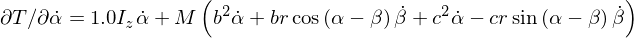

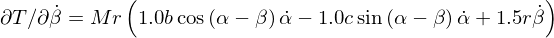

In [7]:
# Definuję symbole do wyświetlenia
dTA = symbols('\partial\\ T/\partial\\dot{\\alpha}')
dTB = symbols('\partial\\ T/\partial\\dot{\\beta}')
dTa = symbols('\partial\\ T/\partial\\alpha')
dTb = symbols('\partial\\ T/\partial\\beta')

# Obliczam pochodne
TdA = diff(T, diff(alpha)).simplify()
TdB = diff(T, diff(beta)).simplify()
Tda = diff(T, alpha).simplify()
Tdb = diff(T, beta).simplify()

# Wyświetlam wynik
display(Eq(dTA, TdA), Eq(dTB, TdB), Eq(dTa, Tda), Eq(dTb, Tdb))

# Pochodne energii potencjalnych

In [8]:
# Definuję symbole do wyświetlenia
dVa = symbols('\partial\\ V/\partial\\alpha')
dVb = symbols('\partial\\ V/\partial\\beta')

# Obliczam pochodne
Vda = diff(V, alpha).expand()
Vdb = diff(V, beta).expand()

# Wyświetlam wynik
display(Eq(dVa, Vda), Eq(dVb, Vdb))

# Pochodne po czasie

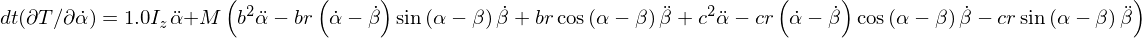

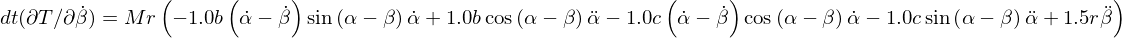

In [9]:
# Definuję symbole do wyświetlenia
dtdTA = symbols('dt(\partial\\ T/\partial\\dot{\\alpha})')
dtdTB = symbols('dt(\partial\\ T/\partial\\dot{\\beta})')

# Obliczam pochodne po czasie
dtTdA = diff(TdA, t).simplify()
dtTdB = diff(TdB, t)
display(Eq(dtdTA, dtTdA), Eq(dtdTB, dtTdB))

# Linearyzacja

Linearyzuję pochodne przez odrzucenie członów o pomijalnej wartości:

In [10]:
dtTA = (IZ + MM*(B**2 + C**2)) * diff(alpha, t, 2) + MM*B*R * diff(beta, t, 2)
dtTB = MM * B * R * diff(alpha, t, 2) + 1.5 * MM * R**2 * diff(beta, t, 2)

display(Eq(dtdTA, dtTA), Eq(dtdTB, dtTB))

Pochodne energii potencjalnych względem współrzędnych uogólnionych pomijam:

\begin{array}{l}
\frac{\partial T}{\partial \alpha} \approx 0 \\
\frac{\partial T}{\partial \beta} \approx 0
\end{array}


# Równania ruchu

Za pomocą obliczonych pochodnych wyznaczam równania ruchu układu:

\begin{array}{l}
\large
\frac{d}{dt}(\frac{\partial T}{\partial \dot{\alpha}})-\frac{\partial T}{\partial \alpha}+\frac{\partial V}{\partial \alpha}=0 \\
\large
\frac{d}{dt}(\frac{\partial T}{\partial \dot{\beta}})-\frac{\partial T}{\partial \beta}+\frac{\partial V}{\partial \beta}=0
\end{array}

In [11]:
display(Eq(expand(dtTA + Vda), 0), Eq(expand(dtTB + Vdb), 0))

# Równanie charakterystyczne

In [12]:
# Wyznaczam macierz bezwładności z równań z drugimi pochodnymi
inert_M = linear_eq_to_matrix([Eq(dtTA, 0), Eq(dtTB, 0)], [diff(alpha, t, 2), diff(beta, t, 2)])[0]

# Podstawiam dane do macierzy bezwładności
M_vals = inert_M.subs([(A, a), (B, b), (C, c), (R, r), (MM, M),  (IZ, Iz)]).evalf(4)

# Wyznaczam macierz sztywności z równań ze współ. uogólnionymi
stiff_k = linear_eq_to_matrix([Eq(Vda, 0), Eq(Vdb, 0)], [alpha, beta])[0]
k_vals = stiff_k.subs([(A, a), (B, b), (R, r), (K1, k1), (K2, k2), (K3, k3)]).evalf(4)

Macierz bezwładności:

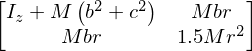

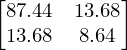

In [13]:
display(inert_M, M_vals)

Macierz sztywności:

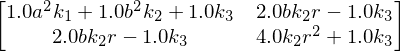

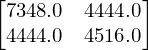

In [14]:
display(stiff_k, k_vals)

# Częstości drgań własnych układu

In [15]:
# Symbole
omega, o1, o2 = symbols('omega omega1 omega2')

# Wyznaczam częstotliwości własne
new = -omega**2 * M_vals + k_vals
display(Eq(new.det().simplify().evalf(4), 0))
freqs = solve(new.det().simplify())

# Obliczam wektory własne
q21 = -(-freqs[2]**2 * M_vals[0, 0] + k_vals[0, 0])/(-freqs[2]**2 * M_vals[0, 1] + k_vals[0, 1])
q12 = -(-freqs[3]**2 * M_vals[1, 1] + k_vals[1, 1])/(-freqs[3]**2 * M_vals[1, 0] + k_vals[1, 0])

Pierwsza postać [rad/s]:

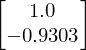

In [16]:
display(Eq(o1, freqs[2].evalf(4)), Matrix([1, q21]).evalf(4))

Druga postać [rad/s]:

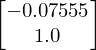

In [17]:
display(Eq(o2, freqs[3].evalf(4)), Matrix([q12, 1]).evalf(4))

# Wyniki

Po lewej pierwsza postać drgań własnych układu, po prawej druga:

![Wyniki](https://github.com/adamsmietanka/Drgania---projekt/blob/master/img/wynik.PNG?raw=true)